<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/06_prediction_net_value_retirement_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from tensorflow.keras.layers import (
    Normalization,
    Dense
)

from keras.models import (
    Sequential
)

from sklearn.model_selection import train_test_split

# **Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

@type: **Mini project**

# **Funcitions**
---

In [ ]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)


def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        height_text = height
        if kwards['p'] == True:
          percentage = round(height/data.shape[0], 5)
          height_text = f'{height} ({percentage})'
        ax.text(p.get_x()+p.get_width()/2., height + 1, height_text, ha="center")
      except Exception as e:
        print(e)

  except Exception as e:
    print(e)

def pie_circle(
    serie:pd.Series,
    paleta=None,
    figsize_x:int=7,
    figsize_y:int=7,
    fontsize=15,
    **kwards)->None:
  """Grafica un anillo"""
  paleta = paleta if paleta !=None else generate_colors()[0]
  values = serie.value_counts().sort_index()
  names = values.index
  size = values.values
  fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de anillo {kwards["title"]}', fontsize=fontsize)
  my_circle = plt.Circle( (0,0), 0.7, color='white')
  plt.pie(
      size,
      labels=names,
      autopct="%0.1f %%",
      wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },
      colors = paleta)
  p = plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()



def matrix_confusion(
    y_true:pd.Series,
    y_pred:pd.Series,
    churm:str='True',
    no_churm:str='False',
    title:str='Matriz de confusion',
    x_size:int=6,
    y_size:int=5,
    **kwards)->np.ndarray:
    """confusion matrix"""
    try:
      matrix = metrics.confusion_matrix(y_true, y_pred)
      fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(x_size, y_size))
      sns.heatmap(matrix, annot=True, ax=ax, fmt='g', **kwards)
      ax.set_title(title,size=20)
      ax.xaxis.set_ticklabels([no_churm,churm])
      ax.yaxis.set_ticklabels([no_churm,churm])
      ax.tick_params(labelsize = 12)
      fig.show()
      return matrix
    except Exception as e:
      print(e)

def optimization_learning_curves(
    history:dict,
    metrica:str,
    title:str='',
    X_size:int=8,
    y_size:int=4,
    font_size:int=15,
    X_label:str='Epoch',
    y_label:str='Loss'
)->None:
  """ Grafica curvas de aprendizaje """
  fig, ax = plt.subplots(figsize=(X_size, y_size))
  fig.suptitle(title, fontsize=font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(X_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper right', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

# **Información**
---

**Datos**
El conjunto de datos incorpora información en relación al costo de la nómina de afiiados titulares soldados profesionales

**Información de la Entidad**
- Área o dependencia	Oficina Asesora de Planeación
- Nombre de la Entidad	Caja de Retiro de las Fuerzas Armadas
- Departamento	Bogotá D.C.
- Municipio	Bogotá D.C.
- Orden	Nacional
- Sector	Defensa

**Información de Datos**
- Idioma	Español
- Cobertura Geográfica	Nacional
- Frecuencia de Actualización	Anual
- Fecha Emisión (aaaa-mm-dd)	27-05-2022

Suministró los datos: Caja de Retiro de las Fuerzas Militares

path data: https://www.datos.gov.co/Seguridad-y-Defensa/Costo-de-n-mina-afiliados-CREMIL/f9yk-tb7k/about_data




# **Dicionario de datos**
---
- PARENTESCO: Afiliado titular
- VALOR_ASIG_RETIRO: Valor mesada pensional del afiiado
- REAJUSTE: Valor ajustado de algún incremento de la asignación de retiro
- TOTAL_ASIGNACION: Sumatoria de la asignación de retiro con el reajuste
- ADICIONALES: Valor de aumento de la asignación de retiro
- TOTAL_DEVENGADO: Valor de la asignación de retiro
- TOTAL_DESCUENTO: 	Valor de algún des cuento de la asignación de retiro
- NETO_PAGAR: Valor total de la mesada neta que recibe el afiliado
- COSTO TOTAL_NOMINA_2019: 	Valor total del pago de la nómina de toda la vigencia
- TOTAL_PRESUPUESTO GENERAL_NACION_2019: Valor asignado de acuerdo al Decreto Ley
- FUERZA: Fuerza Militar a la cual perteneció el afiliado
- GRADO_ALFABETICO: Grado Militar al cual perteneció el afiliado
- RANGO: Rango en el cual afiliado se identificaba en la vida Militar el afiliado
- SEXO: Género del afiliado titular
- EDAD: Edad del afiliado
- CIUDAD: Ubicación geográfica ciudad
- DPTO: Ubicación geográfica departamento o estado
- PAIS: Ubicación geográfica país

# **Variable a predecir**
- **Variable a predecir:**: Valor total de la mesada neta que recibe el afiliado


# **Config**
---

In [ ]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
title_data = 'Costo de nómina afiliados CREMIL'
paleta = sns.color_palette("tab10").as_hex()
warnings.filterwarnings("ignore")
random_seedd = 12354

np.set_printoptions(precision=3, suppress=True)

# **Objetivos**
---

# **Data**

In [ ]:
url = 'https://drive.google.com/file/d/1sB_sWnmPf6aRghJHCCG8QMNwvXp79OV1/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, dtype=str)

In [ ]:
data.head(1)

,PARENTESCO,VALOR_ASIG_RETIRO,REAJUSTE,TOTAL_ASIGNACION,ADICIONALES,TOTAL_DEVENGADO,TOTAL_DESCUENTO,NETO_PAGAR,COSTO TOTAL_NOMINA_2019,TOTAL_PRESUPUESTO GENERAL_NACION_2019,FUERZA,GRADO_ALFABETICO,RANGO,SEXO,EDAD,CIUDAD,DPTO,PAIS
0,TITULAR,1624989,0,1624989,0,1533009,749024,783985,337732874881,243817588608569,EJÉRCITO,SLP,SOLDADO,MASCULINO,45,IBAGUE,TOLIMA,COLOMBIA


In [ ]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16774 entries, 0 to 16773
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   PARENTESCO                             16774 non-null  object
 1   VALOR_ASIG_RETIRO                      16774 non-null  object
 2   REAJUSTE                               16774 non-null  object
 3   TOTAL_ASIGNACION                       16774 non-null  object
 4   ADICIONALES                            16774 non-null  object
 5   TOTAL_DEVENGADO                        16774 non-null  object
 6   TOTAL_DESCUENTO                        16774 non-null  object
 7   NETO_PAGAR                             16774 non-null  object
 8   COSTO TOTAL_NOMINA_2019                16774 non-null  object
 9   TOTAL_PRESUPUESTO GENERAL_NACION_2019  16774 non-null  object
 10  FUERZA                                 16774 non-null  object
 11  GRADO_ALFABETIC

In [ ]:
# Transformación del tipo de dato
data[[
    "VALOR_ASIG_RETIRO",
    "REAJUSTE",
    "TOTAL_ASIGNACION",
    "ADICIONALES",
    "TOTAL_DEVENGADO",
    "TOTAL_DESCUENTO",
    "NETO_PAGAR",
    "COSTO TOTAL_NOMINA_2019",
    "TOTAL_PRESUPUESTO GENERAL_NACION_2019"
]] = data[[
    "VALOR_ASIG_RETIRO",
    "REAJUSTE",
    "TOTAL_ASIGNACION",
    "ADICIONALES",
    "TOTAL_DEVENGADO",
    "TOTAL_DESCUENTO",
    "NETO_PAGAR",
    "COSTO TOTAL_NOMINA_2019",
    "TOTAL_PRESUPUESTO GENERAL_NACION_2019"
]].astype("float64")

data[[
    'EDAD'
]] = data[[
    'EDAD'
]].astype('int32')

In [ ]:
data.select_dtypes(include=['float64', 'int32']).describe()

,VALOR_ASIG_RETIRO,REAJUSTE,TOTAL_ASIGNACION,ADICIONALES,TOTAL_DEVENGADO,TOTAL_DESCUENTO,NETO_PAGAR,COSTO TOTAL_NOMINA_2019,TOTAL_PRESUPUESTO GENERAL_NACION_2019,EDAD
count,"16,774.00","16,774.00","16,774.00","16,774.00","16,774.00","16,774.00","16,774.00","16,774.00","16,774.00","16,774.00"
mean,"1,660,203.54",0.00,"1,658,390.30","2,995.04","1,568,739.07","460,281.71","1,108,457.37","337,732,874,881.00","243,817,588,608,569.00",46.64
std,"229,555.84",0.00,"235,844.36","97,848.88","255,555.87","284,983.90","349,434.27",0.00,0.00,3.61
min,"1,299,465.00",0.00,"46,375.00",0.00,"166,176.00","2,319.00","163,857.00","337,732,874,881.00","243,817,588,608,569.00",39.00
25%,"1,587,770.00",0.00,"1,587,770.00",0.00,"1,497,897.00","114,024.00","802,978.25","337,732,874,881.00","243,817,588,608,569.00",44.00
50%,"1,624,989.00",0.00,"1,624,989.00",0.00,"1,533,009.00","514,627.00","1,039,527.00","337,732,874,881.00","243,817,588,608,569.00",46.00
75%,"1,624,989.00",0.00,"1,624,989.00",0.00,"1,533,009.00","721,646.25","1,413,336.50","337,732,874,881.00","243,817,588,608,569.00",49.00
max,"2,653,604.00",0.00,"2,653,604.00","8,444,994.00","7,555,471.00","2,752,058.00","7,212,824.00","337,732,874,881.00","243,817,588,608,569.00",64.00


In [ ]:
data.select_dtypes(include=['object']).describe()

,PARENTESCO,FUERZA,GRADO_ALFABETICO,RANGO,SEXO,CIUDAD,DPTO,PAIS
count,16774,16774,16774,16774,16774,16774,16774,16774
unique,1,2,2,1,1,656,39,6
top,TITULAR,EJÉRCITO,SLP,SOLDADO,MASCULINO,BOGOTÁ,ANTIOQUIA,COLOMBIA
freq,16774,15683,15683,16774,16774,2278,2044,16760


In [ ]:
data['FUERZA'].value_counts()

FUERZA
EJÉRCITO    15683
ARMADA       1091
Name: count, dtype: int64

In [ ]:
data['GRADO_ALFABETICO'].value_counts()

GRADO_ALFABETICO
SLP    15683
IP      1091
Name: count, dtype: int64

In [ ]:
data['RANGO'].value_counts()

RANGO
SOLDADO    16774
Name: count, dtype: int64

In [ ]:
data['SEXO'].value_counts()

SEXO
MASCULINO    16774
Name: count, dtype: int64

In [ ]:
data['PAIS'].value_counts()

PAIS
COLOMBIA           16760
ESPAÑA                 6
ALEMANIA               5
MEXICO                 1
EMIRATOS ARABES        1
ESTADOS UNIDOS         1
Name: count, dtype: int64

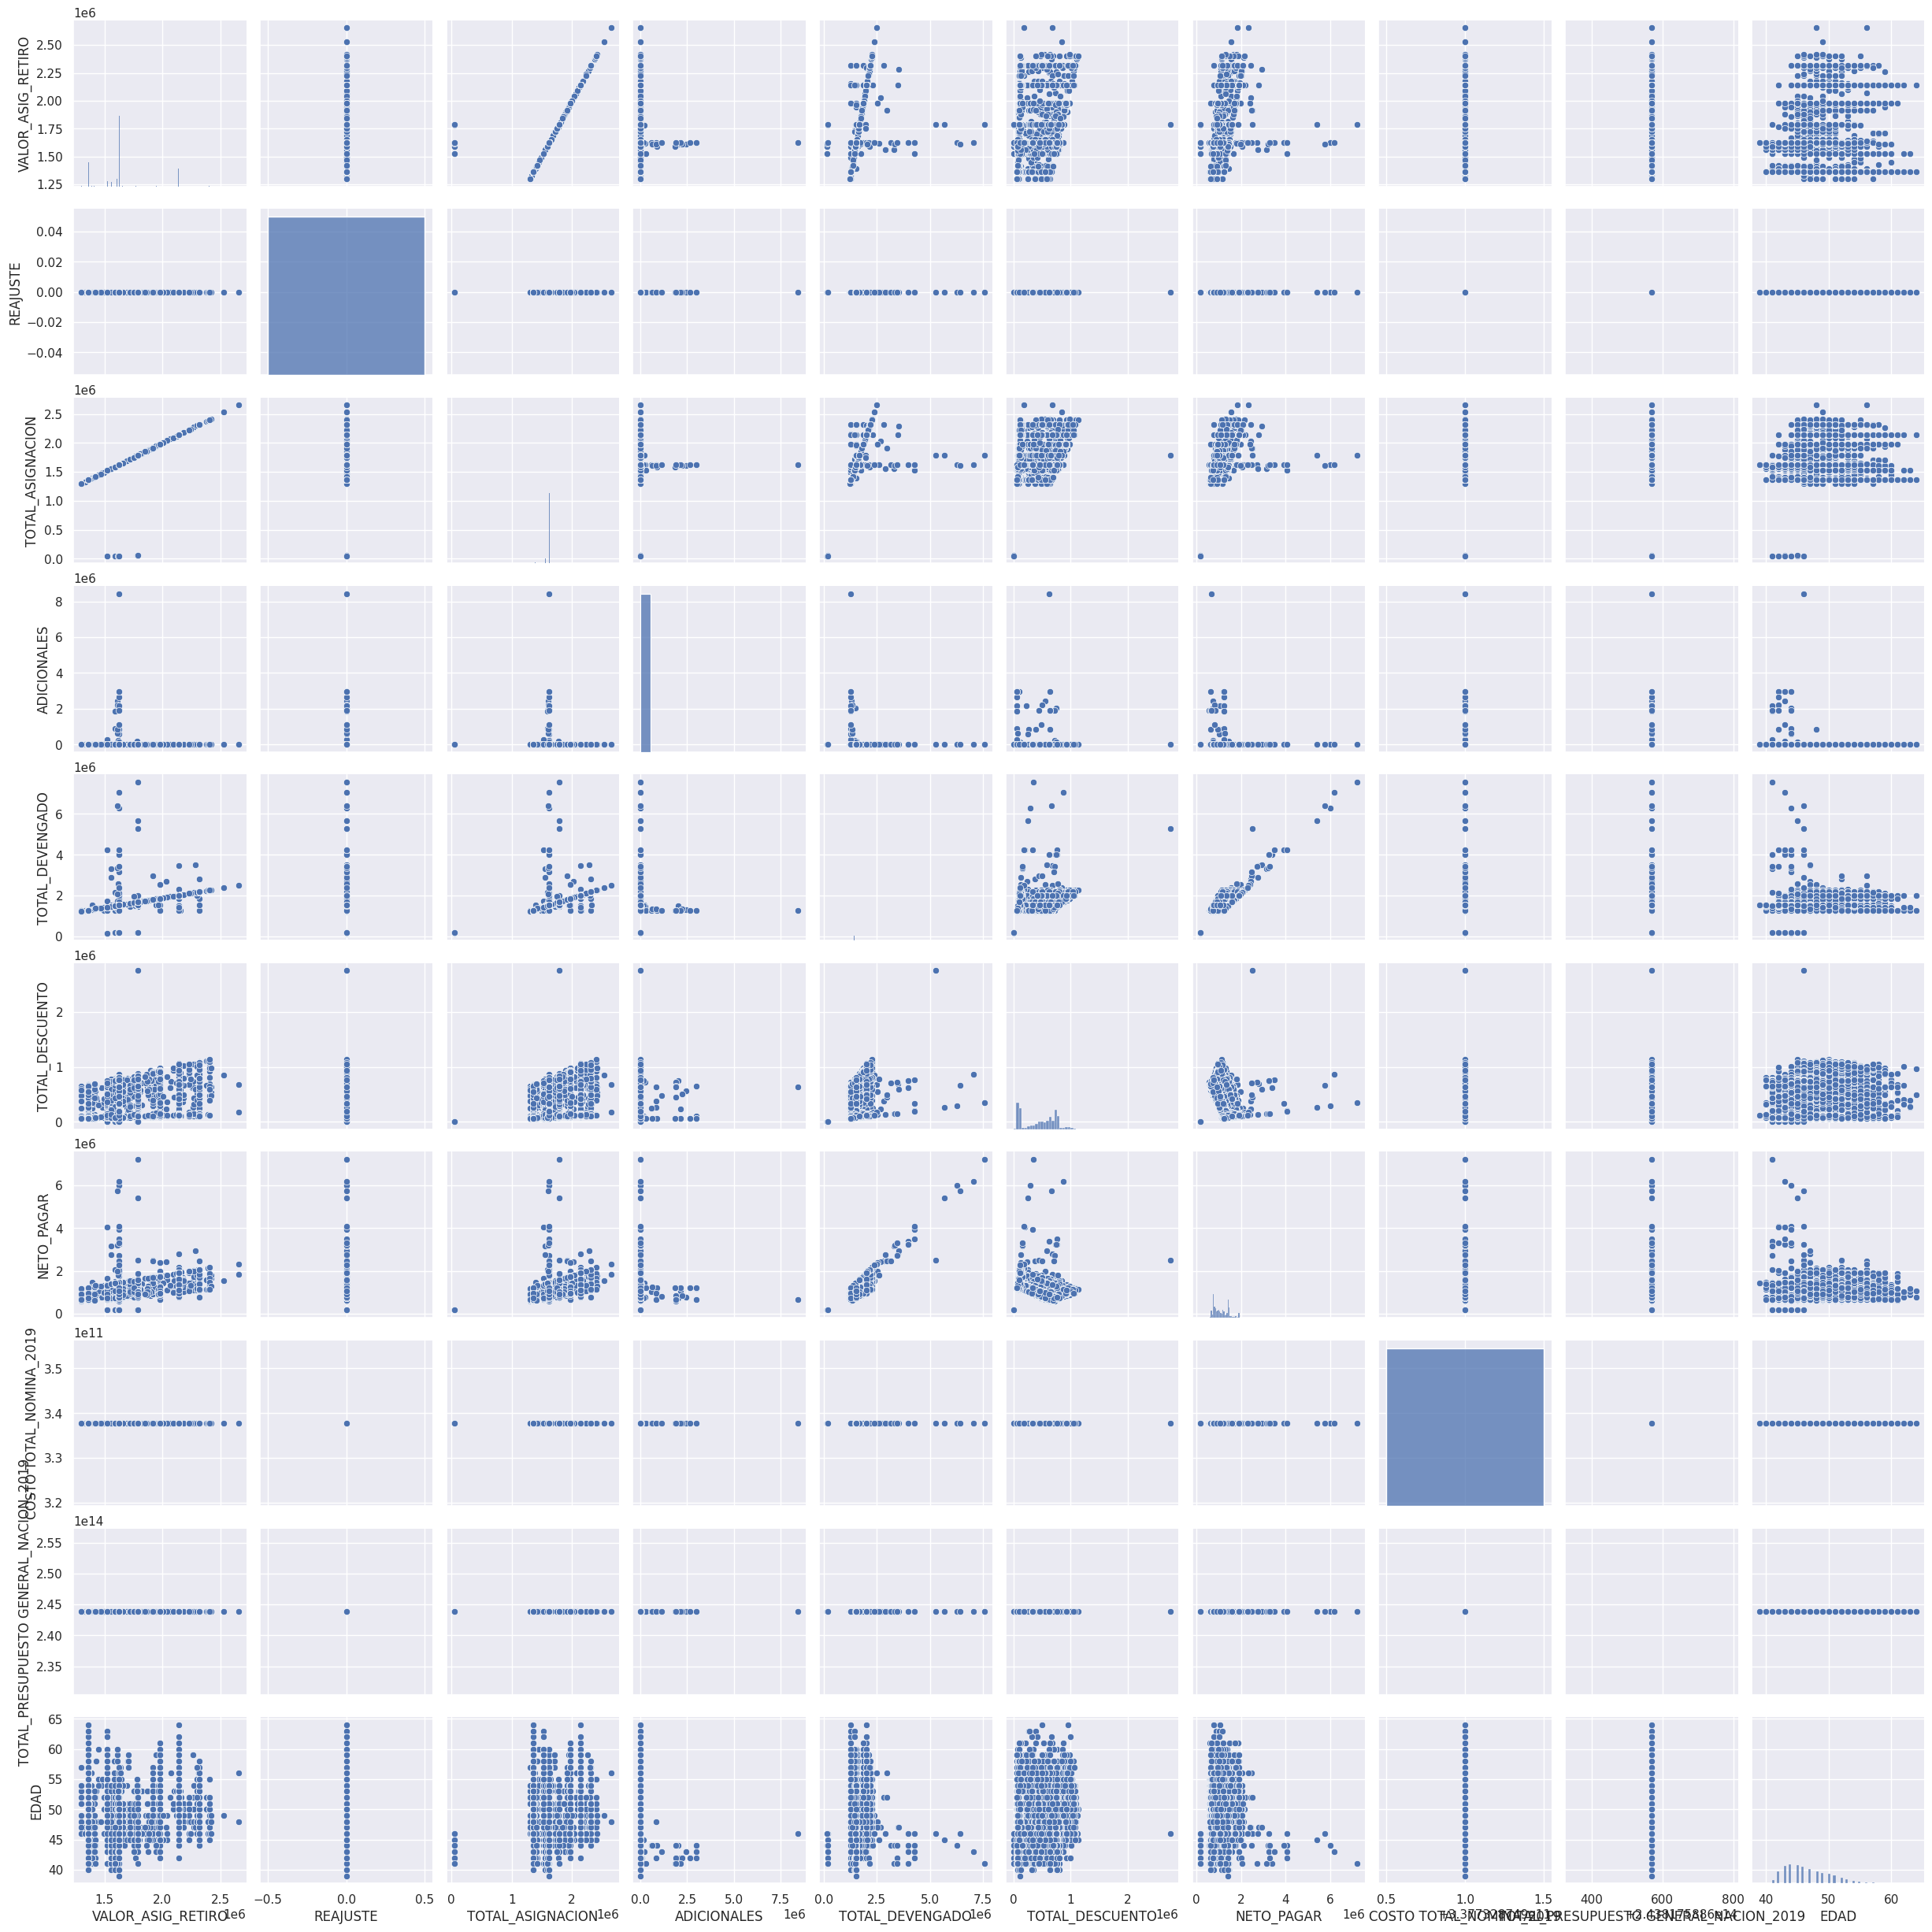

In [ ]:
sns.pairplot(data)

- total devengado-asignado a retiro, descuento, total asignacion


# **Split**

In [ ]:
X_without_cate = data.select_dtypes(include=['int32', 'float64']).drop(
    ['REAJUSTE',
     'COSTO TOTAL_NOMINA_2019',
     'TOTAL_PRESUPUESTO GENERAL_NACION_2019', 'NETO_PAGAR'], axis=1)
y_without_cate = data['NETO_PAGAR']

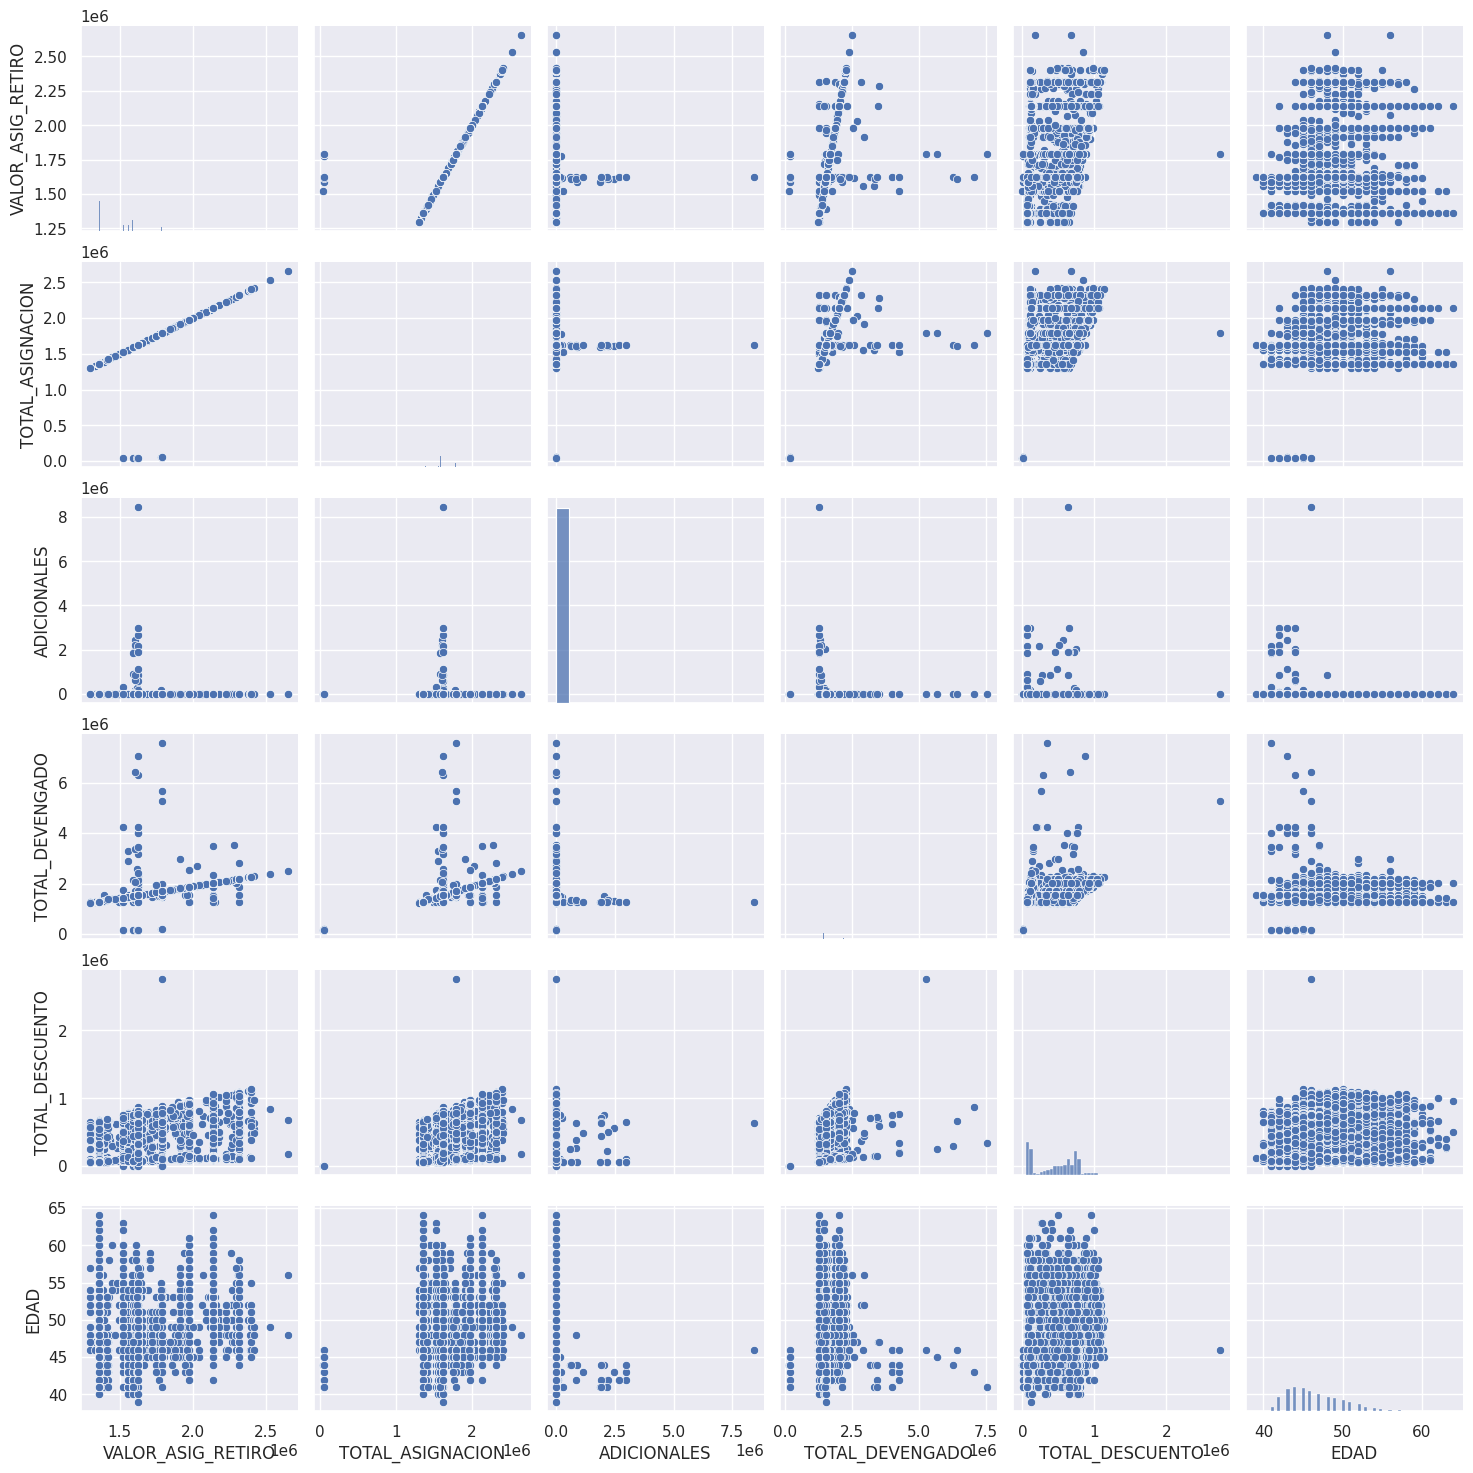

In [ ]:
sns.pairplot(X_without_cate)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_without_cate,
    y_without_cate,
    test_size = 0.2,
    random_state=random_seedd
)

In [ ]:
# Layer normalization layer
normalizer = Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(X_train))

In [ ]:
print(normalizer.mean.numpy())

[[1661364.1   1659097.9      3444.235 1569495.9    459314.03       46.656]]


In [ ]:
first = np.array(X_train)
first

array([[1624989., 1624989.,       0., 1533009.,  108340.,      48.],
       [1624989., 1624989.,       0., 1533009.,   76650.,      45.],
       [1976110., 1976110.,       0., 1864255.,   93213.,      48.],
       ...,
       [1624989., 1624989.,       0., 1533009.,  651780.,      43.],
       [2138328., 2138328.,       0., 2017291.,  687398.,      56.],
       [1361648., 1361648.,       0., 1284574.,  504229.,      46.]])

In [ ]:
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[1624989. 1624989.       0. 1533009.  108340.      48.]
 [1624989. 1624989.       0. 1533009.   76650.      45.]
 [1976110. 1976110.       0. 1864255.   93213.      48.]
 ...
 [1624989. 1624989.       0. 1533009.  651780.      43.]
 [2138328. 2138328.       0. 2017291.  687398.      56.]
 [1361648. 1361648.       0. 1284574.  504229.      46.]]

Normalized: [[-0.16 -0.14 -0.03 -0.14 -1.23  0.37]
 [-0.16 -0.14 -0.03 -0.14 -1.34 -0.46]
 [ 1.37  1.33 -0.03  1.14 -1.28  0.37]
 ...
 [-0.16 -0.14 -0.03 -0.14  0.68 -1.01]
 [ 2.07  2.01 -0.03  1.73  0.8   2.58]
 [-1.3  -1.25 -0.03 -1.1   0.16 -0.18]]


In [ ]:
temporal = np.array(X_without_cate['VALOR_ASIG_RETIRO'])
temporal

array([1624989., 1624989., 1624989., ..., 1624989., 1624989., 1624989.])

In [ ]:
t = Normalization(input_shape=[1, ], axis=None)
t.adapt(temporal)
print(t.mean.numpy())

[1660203.1]


In [ ]:
model = Sequential(
    [
        normalizer,
        Dense(8, kernel_initializer='he_normal', activation='relu'),
        Dense(4, kernel_initializer='he_normal', activation='relu'),
        Dense(1)
    ]
)


In [ ]:
model.compile(
    loss='mean_absolute_error',
    optimizer='adam')

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs = 1700,
    batch_size = 250,
    verbose = 0
)

54 lotes de 250 registros

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 8)                 56        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 110 (444.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


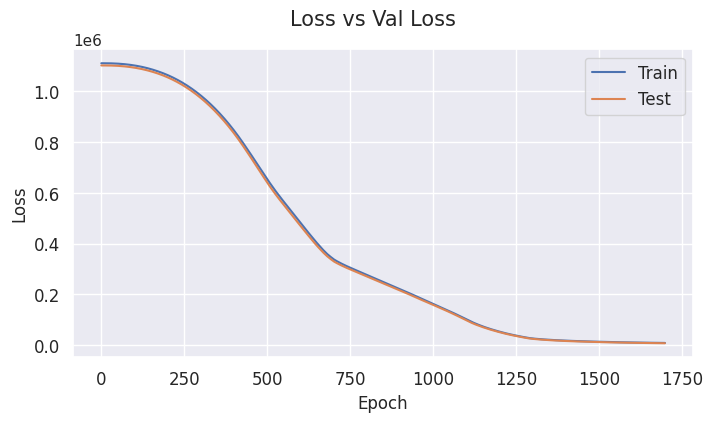

In [ ]:
optimization_learning_curves(history, metrica='loss', title='Loss vs Val Loss')

In [ ]:
y_predict = model.predict(X_test)

105/105 [==============================] - 0s 1ms/step


In [ ]:
y_predict

array([[ 776514.3 ],
       [1118961.  ],
       [1433965.1 ],
       ...,
       [1651105.4 ],
       [1094239.4 ],
       [ 785597.25]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_predict)

7606.547540983606

- El modelo tiende a equivocarse, 7606.54 pesos en la estimación del valor neto a pagar que recibe el afiliado. La cifra no es tan elevada, por lo tanto, el modelo es muy óptimo para este problema, si además se considera que la perdida de entrenamiento y validación, convergen en valores muy bajos.

In [ ]:
for i, j in zip(y_test[:5], y_predict[:5]):
  print(i, j)

776524.0 [776514.3]
1118970.0 [1118961.]
1433985.0 [1433965.1]
1714659.0 [1714639.1]
1898248.0 [1898232.5]


# **Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

@type: **Mini project**